In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd ,nd
import random

In [5]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)

In [10]:
features[0],labels[0]
print(features.shape)
print(labels.shape)

(1000, 2)
(1000,)


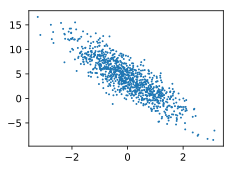

In [8]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);

In [11]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j),labels.take(j)

In [12]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break


[[ 2.0347214  -0.25581995]
 [ 1.3653284  -0.72153825]
 [-0.42541018 -0.63157904]
 [-0.5268329  -0.0313824 ]
 [-0.21862963 -0.03429237]
 [-0.8814681  -0.30124047]
 [ 0.10253508 -1.0057124 ]
 [-0.66986567 -1.4809134 ]
 [-0.5003804  -0.3054179 ]
 [-1.222015   -0.10180566]]
<NDArray 10x2 @cpu(0)> 
[9.147887  9.363408  5.488872  3.2592604 3.8739133 3.4763029 7.8076835
 7.872333  4.242035  2.0887957]
<NDArray 10 @cpu(0)>


In [13]:
w=nd.random.normal(scale=0.01,shape=(num_inputs,1))
b=nd.zeros(shape=(1,))

In [14]:
w.attach_grad()
b.attach_grad()

In [15]:
def linreg(X,w,b):
    return nd.dot(X,w)+b

In [16]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [17]:
def sgd(params,lr,batch_size):
    for param in params:
        param[:]=param-lr*param.grad/batch_size

In [19]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

In [22]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l=loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
    train_l=loss(net(features,w,b),labels)
    print('epoch %d,loss %f' %(epoch+1,train_l.mean().asnumpy()))

epoch 1,loss 0.038845
epoch 2,loss 0.000147
epoch 3,loss 0.000050


In [23]:
true_w,w

([2, -3.4], 
 [[ 2.000225 ]
  [-3.3993268]]
 <NDArray 2x1 @cpu(0)>)

In [24]:
true_b,b

(4.2, 
 [4.1997027]
 <NDArray 1 @cpu(0)>)